In [292]:
import numpy as np
import matplotlib.pyplot as plt
import math as math

In [293]:
def caminhada(N):
    passos1d = np.random.uniform(low = -0.5, high = 0.5, size = (N))
    passos2d = np.random.uniform(low = -0.5, high = 0.5, size = (N))
    return passos1d, passos2d

def somaAcumulada(N, passos):
    soma = []
    soma = soma + [passos[0]]
    for i in range(1, N):
        soma += [soma[-1] + passos[i]]
    return soma


In [294]:
def grafico1a(N):
    passos1, passos2 = caminhada(N)
    soma = somaAcumulada(N, passos1)
    t = np.arange(N)

    plt.plot(t, soma)
    plt.show()
N = 100000


# 1 - a

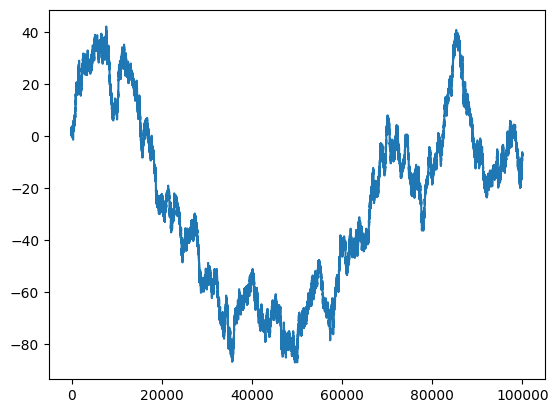

In [295]:
grafico1a(N)

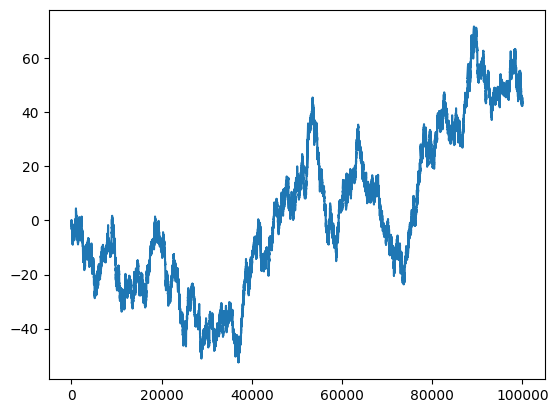

In [296]:
grafico1a(N)

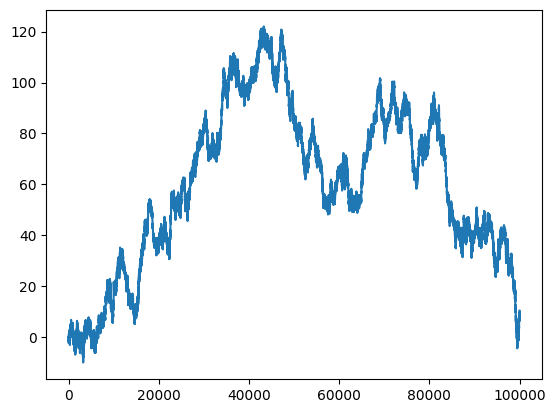

In [297]:
grafico1a(N)

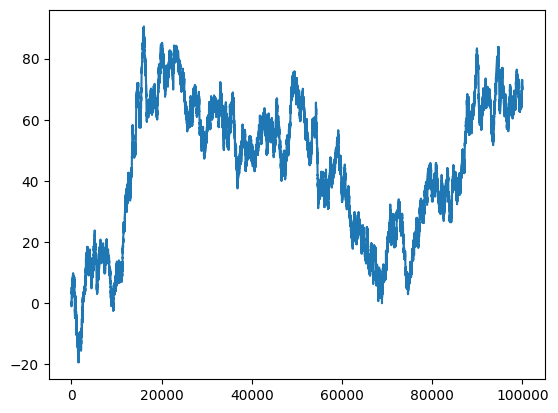

In [298]:
grafico1a(N)

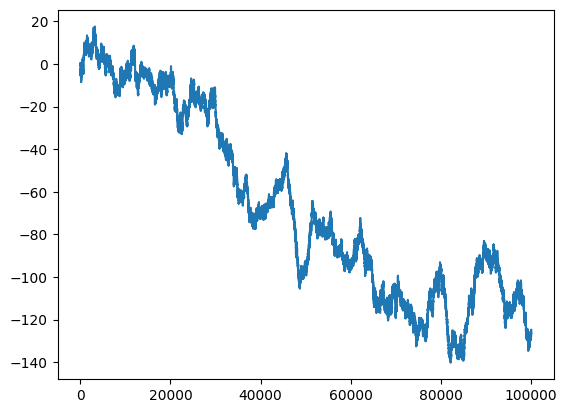

In [299]:
grafico1a(N)

In [300]:
def grafico1b(N):
    passos1, passos2 = caminhada(N)
    X = somaAcumulada(N, passos1)
    Y = somaAcumulada(N, passos2)
    distancia = (math.sqrt( (X[-1]-X[0])**2 + (Y[-1] - Y[0])**2 ))
    plt.axis('equal')
    plt.plot(X, Y)
    plt.show()

    return distancia


# 1 - b

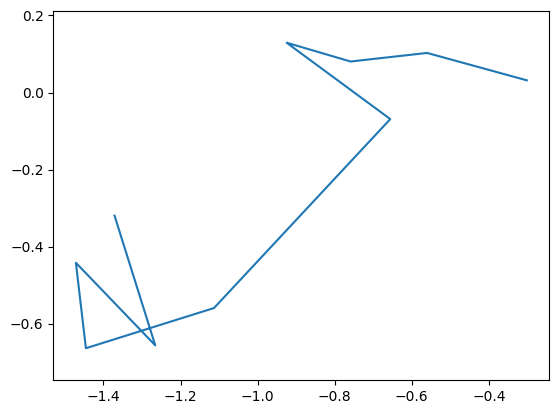

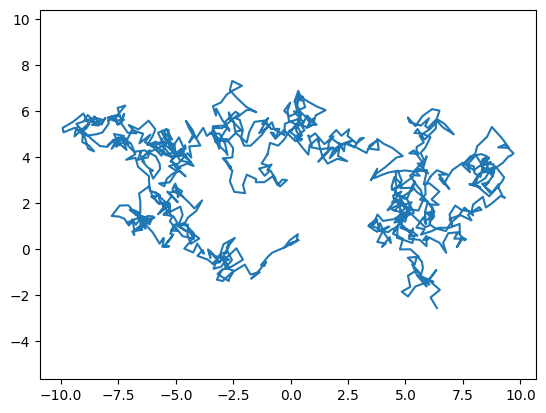

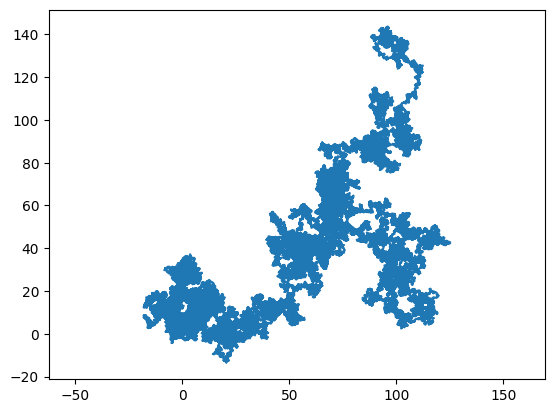

Aumento da distancia de 10 para 1000 e de 5.95895126392769x mais
Aumento da distancia de 1000 para 100000 e de 24.994354805481546x mais


In [301]:
dist10 = grafico1b(10)
dist1000 = grafico1b(1000)
dist100000 = grafico1b(100000)

print(f'Aumento da distancia de 10 para 1000 e de {dist1000/dist10}x mais')
print(f'Aumento da distancia de 1000 para 100000 e de {dist100000/dist1000}x mais')

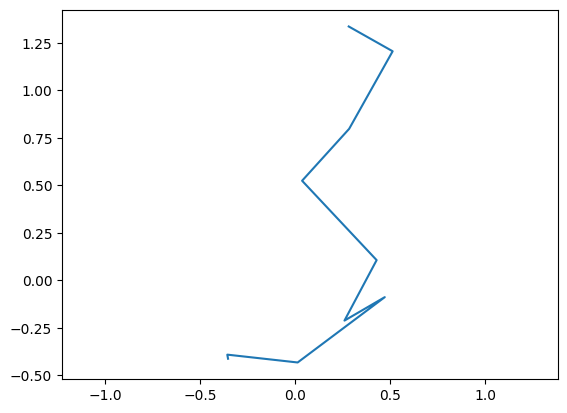

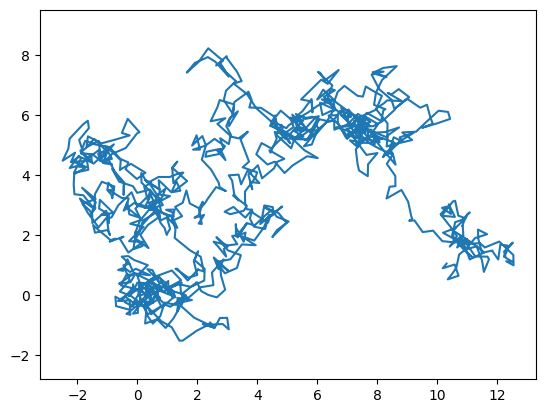

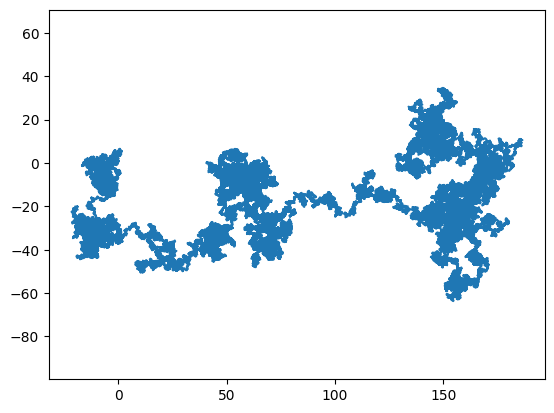

Aumento da distancia de 10 para 1000 e de 5.807408237470585x mais
Aumento da distancia de 1000 para 100000 e de 16.57871473008649x mais


In [302]:
dist10 = grafico1b(10)
dist1000 = grafico1b(1000)
dist100000 = grafico1b(100000)

print(f'Aumento da distancia de 10 para 1000 e de {dist1000/dist10}x mais')
print(f'Aumento da distancia de 1000 para 100000 e de {dist100000/dist1000}x mais')

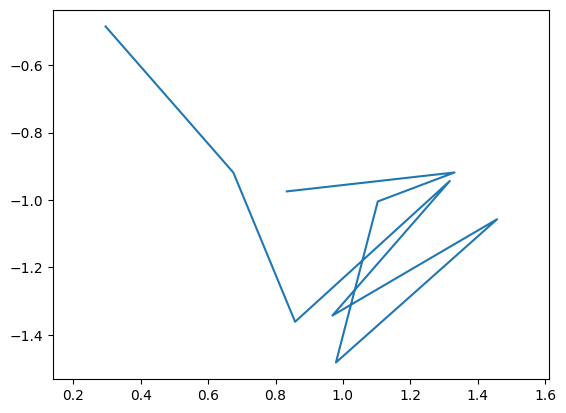

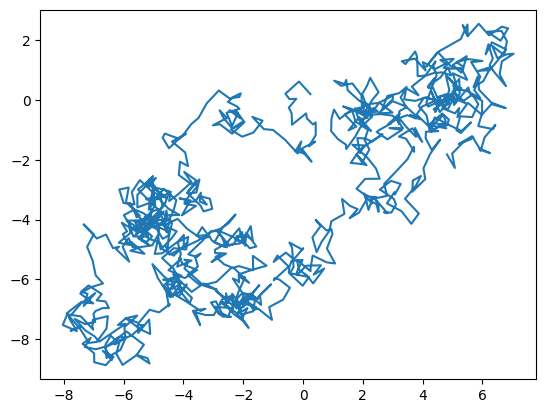

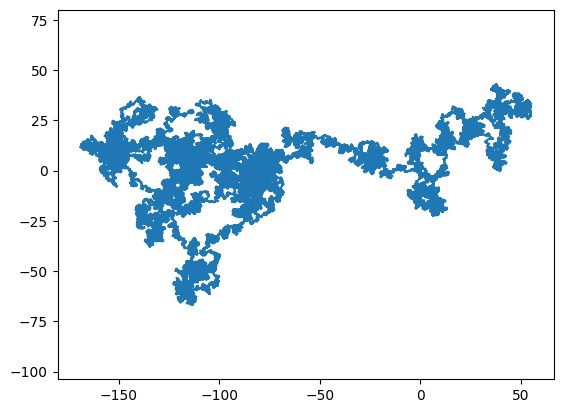

Aumento da distancia de 10 para 1000 e de 6.872234806634915x mais
Aumento da distancia de 1000 para 100000 e de 23.63285671277316x mais


In [303]:
dist10 = grafico1b(10)
dist1000 = grafico1b(1000)
dist100000 = grafico1b(100000)

print(f'Aumento da distancia de 10 para 1000 e de {dist1000/dist10}x mais')
print(f'Aumento da distancia de 1000 para 100000 e de {dist100000/dist1000}x mais')

Consideramos que aumenta por *cerca* de 10x.

# 2

In [304]:
def coordenadaFinalDaCaminhada(N):
    passos1, passos2 = caminhada(N)
    X = somaAcumulada(N, passos1)
    Y = somaAcumulada(N, passos2)

    return X[-1], Y[-1]

def distribuicaoCoordenadasFinais(numCaminhadas, numPassosPorCaminhada):
    X = np.zeros(numCaminhadas)
    Y = np.zeros(numCaminhadas)

    for i in range(numCaminhadas):
        X[i], Y[i] = coordenadaFinalDaCaminhada(numPassosPorCaminhada)

    plt.axis('equal')
    plt.plot(X, Y)
    plt.show()

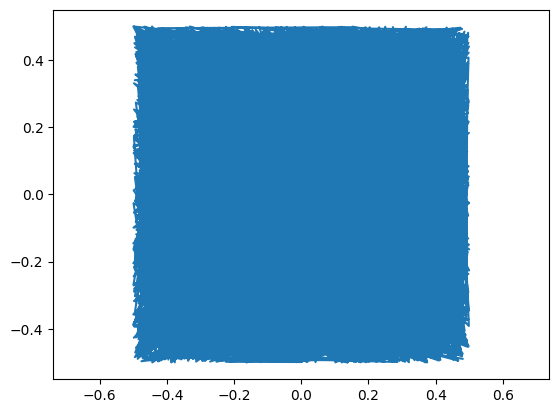

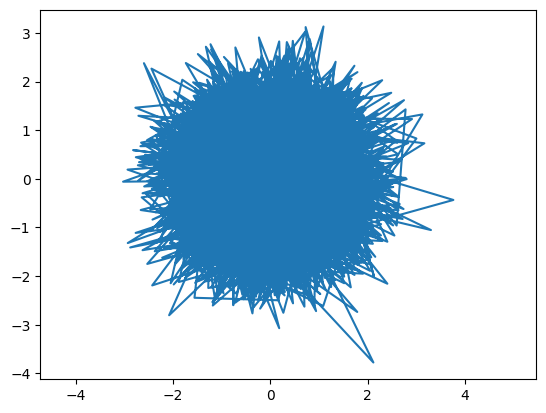

In [305]:
distribuicaoCoordenadasFinais(10_000, 1)
distribuicaoCoordenadasFinais(10_000, 10)

# c

In [306]:
def coordenadaFinalDaCaminhada1d(N):
    passos1, passos2 = caminhada(N)
    X = somaAcumulada(N, passos1)
    return X[-1], (passos1 ** 2).sum()

def distribuicaoCoordenadasFinais1d(numCaminhadas, numPassosPorCaminhada):
    X = np.zeros(numCaminhadas)
    soma_quadrados_total = 0
    for i in range(numCaminhadas):
        X[i],soma_quadrados = coordenadaFinalDaCaminhada1d(numPassosPorCaminhada)
        soma_quadrados_total += soma_quadrados
    soma_quadrados_total = soma_quadrados_total/(numCaminhadas * numPassosPorCaminhada)
    soma_quadrados_total = math.sqrt(soma_quadrados_total)

    t = math.sqrt(numPassosPorCaminhada) * soma_quadrados_total
    gauss = []
    for x in np.arange(-3*t, 3*t, 0.01):
        gauss += [(1/math.sqrt(2*math.pi* t))* (math.e**(-((x**2)/(2*t**2))))]
    plt.plot(np.arange(-3*t, 3*t, 0.01), gauss)
    plt.show()
    plt.hist(X, 50, rwidth=0.8)
    plt.show()



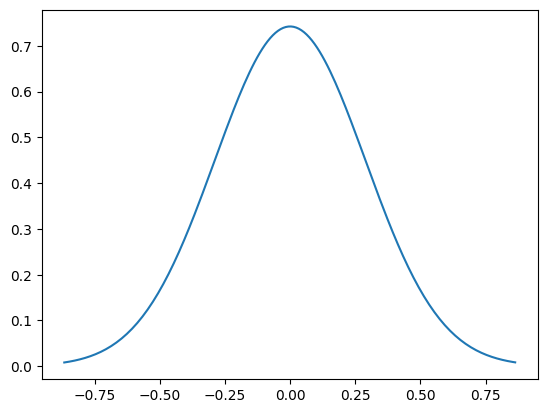

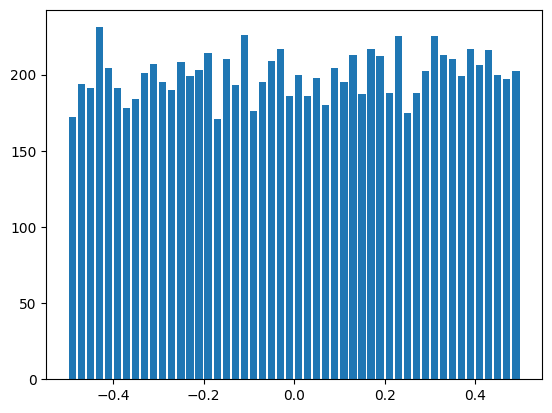

In [307]:
distribuicaoCoordenadasFinais1d(10_000, 1)


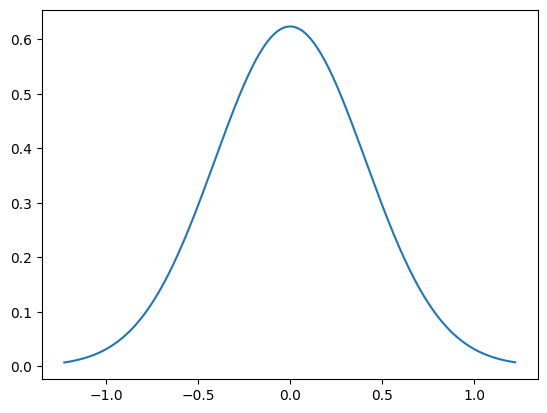

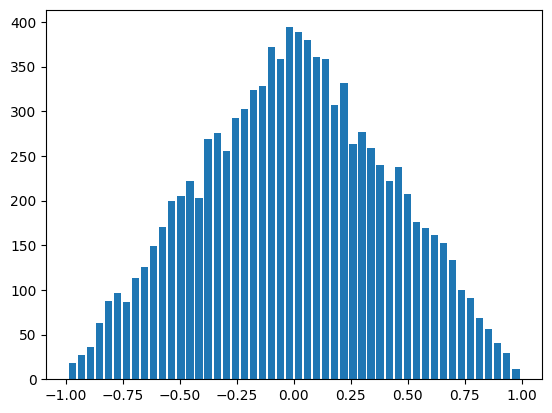

In [308]:
distribuicaoCoordenadasFinais1d(10_000, 2)


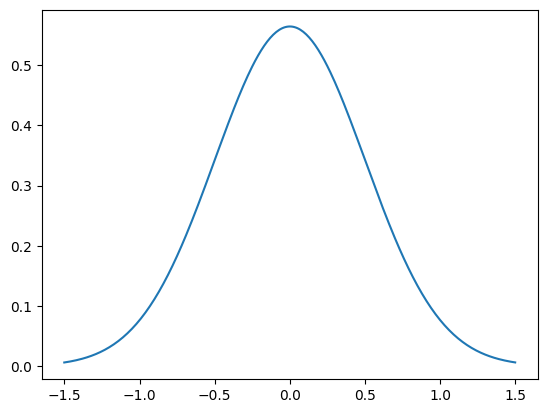

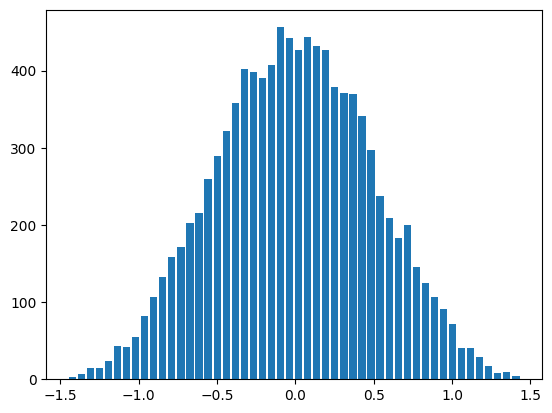

In [309]:
distribuicaoCoordenadasFinais1d(10_000, 3)


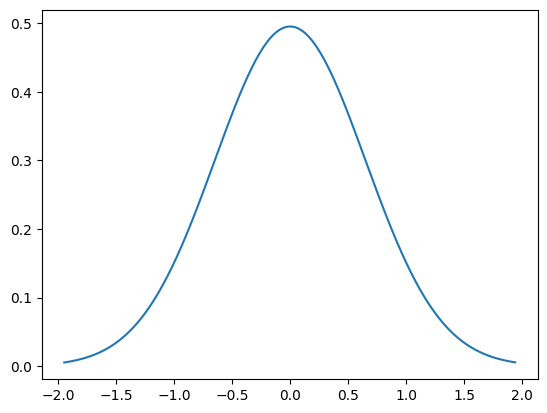

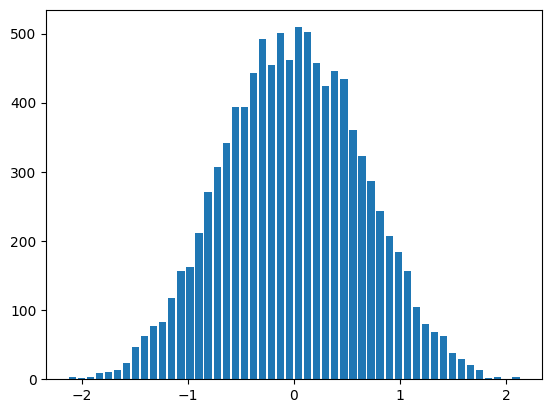

In [310]:
distribuicaoCoordenadasFinais1d(10_000, 5)


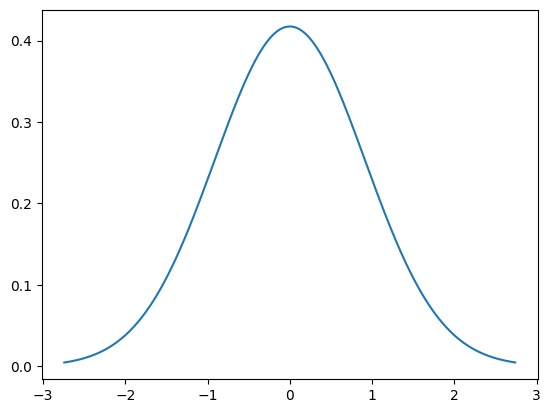

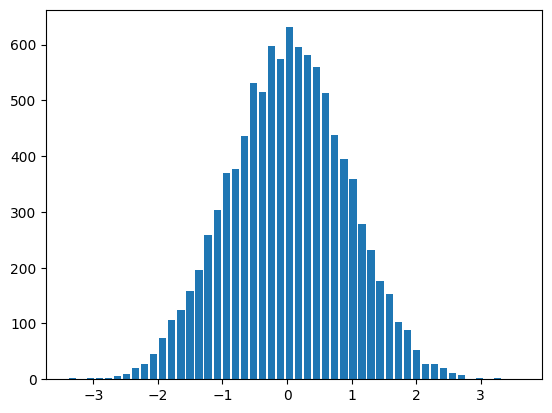

In [311]:
distribuicaoCoordenadasFinais1d(10_000, 10)
